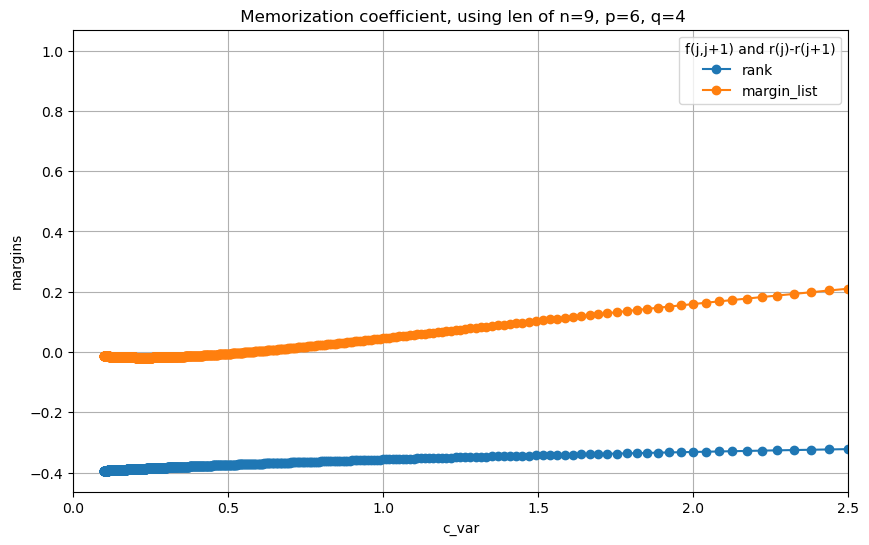

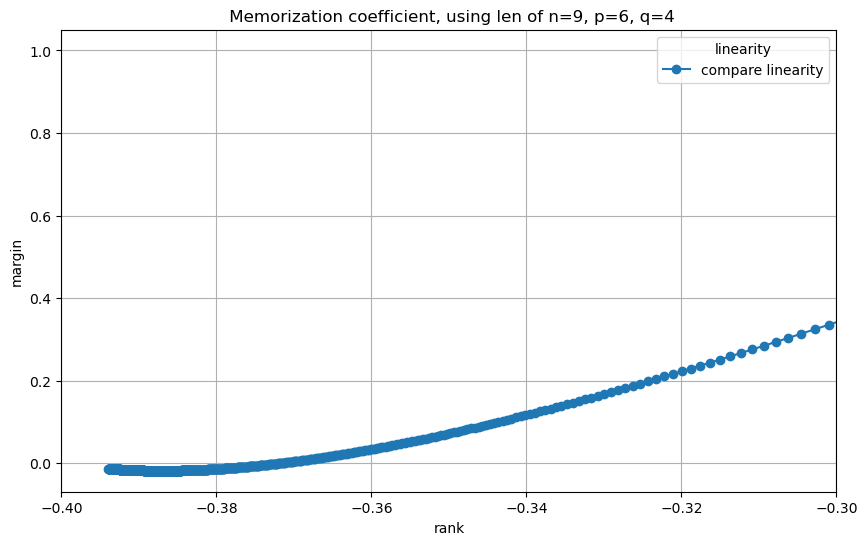

In [18]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

# pseudo
# testing f(x_j,x_j+1) vs r(j) - r(j+1)
# get margins and put it in for different regularization values
# get ranks and put it in array

# Set initial parameters
n = 9  # fix n
p = 6
q = 4
k_o_vals = np.arange(.3, 0.499, 0.001)
k_s = 1
k_d = 0
k_o = 0.4
delta_s = k_s - k_d 
excep_len = 3 
c_var_vals = np.arange(1e-4, 10, 0.01)
c_vals = 1/(c_var_vals * delta_s)
j=5

margin_list_array = []
rank_list_array = []

for c_val in c_vals:
    sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_val)
    # where do we get the ranks? (in calc_ranks)
    ranks = sim.calc_rank()
    rank_form = ranks[j-1] - ranks[j]
    rank_list_array.append(float(rank_form))

    margin_test = sim.f_j_k(j,j+1)
    margin_list_array.append(margin_test)

# Plot results

plt.figure(figsize=(10, 6))
plt.title(f' Memorization coefficient, using len of n={n}, p={p}, q={q}')
plt.plot(c_vals, rank_list_array, marker='o', label=f'rank')
plt.plot(c_vals, margin_list_array, marker='o', label=f'margin_list')
plt.legend(title="f(j,j+1) and r(j)-r(j+1)")
plt.xlim(0, 2.5)
plt.xlabel('c_var')
plt.ylabel('margins')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.title(f' Memorization coefficient, using len of n={n}, p={p}, q={q}')
plt.plot(rank_list_array, margin_list_array, marker='o', label=f'compare linearity')
plt.legend(title="linearity")
plt.xlim(-.4, -.3)
plt.xlabel('rank')
plt.ylabel('margin')
plt.grid(True)
plt.show()


In [ ]:
type(sim.calc_rank()[j-1] - sim.calc_rank()[j])

TypeError: 'method' object is not subscriptable